# Imports and Initialization
## Import required modules

In [1]:
!git clone https://github.com/vamsigp/EVA5

Cloning into 'EVA5'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 178 (delta 69), reused 123 (delta 32), pack-reused 0
Receiving objects: 100% (178/178), 14.34 MiB | 7.34 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [2]:
%cd EVA5/week-7/Trails-2/ 

/content/EVA5/week-7/Trails-2


In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from config import ModelConfig
from data_engine import DataEngine
from model import Net
from train import train
from test import test
from results import plot_misclassified_images, plot_graph
from utils import *

# Model Configuration and Set Seed
### View model configuration and set the seed

In [4]:
# View model config
args = ModelConfig()
args.print_config()

print()
# Set seed
init_seed(args)

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 64,
  'dropout_value': 0.15,
  'epochs': 50,
  'num_workers': 4,
  'seed': 1}



# Data Loading and Visualization
## Preprocess and load the cifar10 dataset. Visualise the dataset.

Files already downloaded and verified
Files already downloaded and verified
  cat  deer  deer   dog


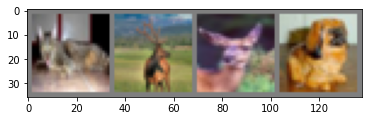

In [6]:
data = DataEngine(args)

# get some random training images
dataiter = iter(data.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % data.classes[labels[j]] for j in range(4)))

In [7]:
device = which_device()
model = Net(args).to(device)
show_model_summary(model, device, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
         MaxPool2d-8           [-1, 32, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          18,432
             ReLU-10           [-1, 64, 16, 16]               0
      BatchNorm2d-11           [-1, 64, 16, 16]             128
          Dropout-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          36,864
             ReLU-14           [-1, 64,

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

def run():
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  for epoch in range(args.epochs):
      print("EPOCH:", epoch+1)
      train(model, device, data.train_loader, criterion, optimizer, epoch)
      test(model, device, data.test_loader, criterion, data.classes, test_losses, test_accs, misclassified_imgs, epoch==args.epochs-1)
  return test_losses, test_accs, misclassified_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs = run()

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.0792840719223022 Batch_id=781 Accuracy=46.99: 100%|██████████| 782/782 [05:23<00:00,  2.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0186, Accuracy: 5727/10000 (57.27%)

EPOCH: 2


Loss=1.2973641157150269 Batch_id=781 Accuracy=62.02: 100%|██████████| 782/782 [05:17<00:00,  2.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0153, Accuracy: 6568/10000 (65.68%)

EPOCH: 3


Loss=1.1276310682296753 Batch_id=781 Accuracy=67.69: 100%|██████████| 782/782 [05:17<00:00,  2.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0131, Accuracy: 7011/10000 (70.11%)

EPOCH: 4


Loss=0.5081765651702881 Batch_id=781 Accuracy=71.36: 100%|██████████| 782/782 [05:15<00:00,  2.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0124, Accuracy: 7176/10000 (71.76%)

EPOCH: 5


Loss=0.47301530838012695 Batch_id=781 Accuracy=73.98: 100%|██████████| 782/782 [05:16<00:00,  2.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0113, Accuracy: 7466/10000 (74.66%)

EPOCH: 6


Loss=0.8508286476135254 Batch_id=781 Accuracy=75.60: 100%|██████████| 782/782 [05:16<00:00,  2.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0108, Accuracy: 7626/10000 (76.26%)

EPOCH: 7


Loss=0.9121752381324768 Batch_id=781 Accuracy=76.95: 100%|██████████| 782/782 [05:18<00:00,  2.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0103, Accuracy: 7718/10000 (77.18%)

EPOCH: 8


Loss=0.5541428923606873 Batch_id=781 Accuracy=78.31: 100%|██████████| 782/782 [05:15<00:00,  2.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0102, Accuracy: 7749/10000 (77.49%)

EPOCH: 9


Loss=0.4542817771434784 Batch_id=781 Accuracy=79.38: 100%|██████████| 782/782 [05:18<00:00,  2.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0095, Accuracy: 7898/10000 (78.98%)

EPOCH: 10


Loss=0.8242830634117126 Batch_id=781 Accuracy=80.14: 100%|██████████| 782/782 [05:14<00:00,  2.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0093, Accuracy: 7958/10000 (79.58%)

EPOCH: 11


Loss=0.7859362363815308 Batch_id=781 Accuracy=81.00: 100%|██████████| 782/782 [05:18<00:00,  2.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0090, Accuracy: 8026/10000 (80.26%)

EPOCH: 12


Loss=0.29747912287712097 Batch_id=781 Accuracy=81.52: 100%|██████████| 782/782 [05:12<00:00,  2.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0089, Accuracy: 8083/10000 (80.83%)

EPOCH: 13


Loss=0.3388137221336365 Batch_id=781 Accuracy=82.17: 100%|██████████| 782/782 [05:13<00:00,  2.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0089, Accuracy: 8065/10000 (80.65%)

EPOCH: 14


Loss=0.5865290760993958 Batch_id=781 Accuracy=83.11: 100%|██████████| 782/782 [05:10<00:00,  2.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0086, Accuracy: 8111/10000 (81.11%)

EPOCH: 15


Loss=0.5351171493530273 Batch_id=781 Accuracy=83.67: 100%|██████████| 782/782 [05:11<00:00,  2.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0084, Accuracy: 8156/10000 (81.56%)

EPOCH: 16


Loss=1.000867486000061 Batch_id=781 Accuracy=84.14: 100%|██████████| 782/782 [05:12<00:00,  2.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0082, Accuracy: 8217/10000 (82.17%)

EPOCH: 17


Loss=0.15314266085624695 Batch_id=781 Accuracy=84.75: 100%|██████████| 782/782 [05:11<00:00,  2.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0083, Accuracy: 8236/10000 (82.36%)

EPOCH: 18


Loss=0.7156851887702942 Batch_id=781 Accuracy=85.01: 100%|██████████| 782/782 [05:14<00:00,  2.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0081, Accuracy: 8240/10000 (82.40%)

EPOCH: 19


Loss=0.9078231453895569 Batch_id=781 Accuracy=85.38: 100%|██████████| 782/782 [05:10<00:00,  2.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0082, Accuracy: 8218/10000 (82.18%)

EPOCH: 20


Loss=0.3688089847564697 Batch_id=781 Accuracy=85.63: 100%|██████████| 782/782 [05:13<00:00,  2.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0079, Accuracy: 8287/10000 (82.87%)

EPOCH: 21


Loss=0.0848155990242958 Batch_id=781 Accuracy=86.15: 100%|██████████| 782/782 [05:10<00:00,  2.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 8338/10000 (83.38%)

EPOCH: 22


Loss=0.7409461736679077 Batch_id=781 Accuracy=86.22: 100%|██████████| 782/782 [05:12<00:00,  2.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 8370/10000 (83.70%)

EPOCH: 23


Loss=0.32902684807777405 Batch_id=781 Accuracy=86.73: 100%|██████████| 782/782 [05:10<00:00,  2.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0075, Accuracy: 8401/10000 (84.01%)

EPOCH: 24


Loss=0.6716322898864746 Batch_id=781 Accuracy=86.84: 100%|██████████| 782/782 [05:14<00:00,  2.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 8324/10000 (83.24%)

EPOCH: 25


Loss=0.6205192804336548 Batch_id=781 Accuracy=87.19: 100%|██████████| 782/782 [05:11<00:00,  2.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0076, Accuracy: 8381/10000 (83.81%)

EPOCH: 26


Loss=0.5150882601737976 Batch_id=781 Accuracy=87.49: 100%|██████████| 782/782 [05:11<00:00,  2.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0074, Accuracy: 8407/10000 (84.07%)

EPOCH: 27


Loss=0.35813435912132263 Batch_id=781 Accuracy=87.62: 100%|██████████| 782/782 [05:11<00:00,  2.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0074, Accuracy: 8420/10000 (84.20%)

EPOCH: 28


Loss=0.8642839193344116 Batch_id=781 Accuracy=88.26: 100%|██████████| 782/782 [05:11<00:00,  2.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0074, Accuracy: 8413/10000 (84.13%)

EPOCH: 29


Loss=0.5014004111289978 Batch_id=781 Accuracy=88.30: 100%|██████████| 782/782 [05:14<00:00,  2.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8435/10000 (84.35%)

EPOCH: 30


Loss=0.16577598452568054 Batch_id=781 Accuracy=88.59: 100%|██████████| 782/782 [05:11<00:00,  2.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0074, Accuracy: 8396/10000 (83.96%)

EPOCH: 31


Loss=0.2342316061258316 Batch_id=781 Accuracy=88.67: 100%|██████████| 782/782 [05:11<00:00,  2.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8457/10000 (84.57%)

EPOCH: 32


Loss=0.3497718870639801 Batch_id=781 Accuracy=88.97: 100%|██████████| 782/782 [05:09<00:00,  2.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 86 %
Accuracy of  bird : 77 %
Accuracy of   cat : 67 %
Accuracy of  deer : 84 %
Accuracy of   dog : 74 %
Accuracy of  frog : 93 %
Accuracy of horse : 78 %
Accuracy of  ship : 85 %
Accuracy of truck : 84 %

Test set: Average loss: 0.0071, Accuracy: 8502/10000 (85.02%)

EPOCH: 33


Loss=0.3964238166809082 Batch_id=781 Accuracy=89.21: 100%|██████████| 782/782 [05:10<00:00,  2.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0074, Accuracy: 8422/10000 (84.22%)

EPOCH: 34


Loss=0.35850876569747925 Batch_id=781 Accuracy=89.28: 100%|██████████| 782/782 [05:11<00:00,  2.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0074, Accuracy: 8435/10000 (84.35%)

EPOCH: 35


Loss=0.6488564014434814 Batch_id=781 Accuracy=89.34: 100%|██████████| 782/782 [05:07<00:00,  2.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8455/10000 (84.55%)

EPOCH: 36


Loss=0.7476283311843872 Batch_id=781 Accuracy=89.57: 100%|██████████| 782/782 [05:08<00:00,  2.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0074, Accuracy: 8439/10000 (84.39%)

EPOCH: 37


Loss=0.3207833170890808 Batch_id=781 Accuracy=89.80: 100%|██████████| 782/782 [05:07<00:00,  2.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0074, Accuracy: 8460/10000 (84.60%)

EPOCH: 38


Loss=0.19647032022476196 Batch_id=781 Accuracy=89.79: 100%|██████████| 782/782 [05:07<00:00,  2.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 83 %
Accuracy of   car : 95 %
Accuracy of  bird : 72 %
Accuracy of   cat : 66 %
Accuracy of  deer : 85 %
Accuracy of   dog : 89 %
Accuracy of  frog : 89 %
Accuracy of horse : 91 %
Accuracy of  ship : 89 %
Accuracy of truck : 97 %

Test set: Average loss: 0.0071, Accuracy: 8528/10000 (85.28%)

EPOCH: 39


Loss=0.6083879470825195 Batch_id=781 Accuracy=89.95: 100%|██████████| 782/782 [05:07<00:00,  2.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8439/10000 (84.39%)

EPOCH: 40


Loss=0.3772872984409332 Batch_id=781 Accuracy=90.23: 100%|██████████| 782/782 [05:11<00:00,  2.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 8499/10000 (84.99%)

EPOCH: 41


Loss=0.06959448754787445 Batch_id=781 Accuracy=90.34: 100%|██████████| 782/782 [05:08<00:00,  2.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8477/10000 (84.77%)

EPOCH: 42


Loss=1.0480352640151978 Batch_id=781 Accuracy=90.55: 100%|██████████| 782/782 [05:06<00:00,  2.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 87 %
Accuracy of   car : 92 %
Accuracy of  bird : 70 %
Accuracy of   cat : 65 %
Accuracy of  deer : 90 %
Accuracy of   dog : 74 %
Accuracy of  frog : 88 %
Accuracy of horse : 90 %
Accuracy of  ship : 90 %
Accuracy of truck : 86 %

Test set: Average loss: 0.0073, Accuracy: 8520/10000 (85.20%)

EPOCH: 43


Loss=0.09448286890983582 Batch_id=781 Accuracy=90.69: 100%|██████████| 782/782 [05:09<00:00,  2.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8486/10000 (84.86%)

EPOCH: 44


Loss=0.39831411838531494 Batch_id=781 Accuracy=90.73: 100%|██████████| 782/782 [05:09<00:00,  2.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 94 %
Accuracy of  bird : 78 %
Accuracy of   cat : 76 %
Accuracy of  deer : 85 %
Accuracy of   dog : 86 %
Accuracy of  frog : 86 %
Accuracy of horse : 89 %
Accuracy of  ship : 90 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0069, Accuracy: 8556/10000 (85.56%)

EPOCH: 45


Loss=0.6522151827812195 Batch_id=781 Accuracy=90.79: 100%|██████████| 782/782 [05:11<00:00,  2.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 87 %
Accuracy of   car : 91 %
Accuracy of  bird : 72 %
Accuracy of   cat : 81 %
Accuracy of  deer : 83 %
Accuracy of   dog : 84 %
Accuracy of  frog : 92 %
Accuracy of horse : 83 %
Accuracy of  ship : 89 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0071, Accuracy: 8521/10000 (85.21%)

EPOCH: 46


Loss=0.37432369589805603 Batch_id=781 Accuracy=90.93: 100%|██████████| 782/782 [05:07<00:00,  2.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 98 %
Accuracy of  bird : 82 %
Accuracy of   cat : 73 %
Accuracy of  deer : 88 %
Accuracy of   dog : 62 %
Accuracy of  frog : 95 %
Accuracy of horse : 88 %
Accuracy of  ship : 98 %
Accuracy of truck : 87 %

Test set: Average loss: 0.0070, Accuracy: 8562/10000 (85.62%)

EPOCH: 47


Loss=0.46255600452423096 Batch_id=781 Accuracy=91.18: 100%|██████████| 782/782 [05:10<00:00,  2.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 8460/10000 (84.60%)

EPOCH: 48


Loss=0.08712898194789886 Batch_id=781 Accuracy=91.28: 100%|██████████| 782/782 [05:07<00:00,  2.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 90 %
Accuracy of  bird : 83 %
Accuracy of   cat : 74 %
Accuracy of  deer : 83 %
Accuracy of   dog : 69 %
Accuracy of  frog : 85 %
Accuracy of horse : 86 %
Accuracy of  ship : 82 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0071, Accuracy: 8529/10000 (85.29%)

EPOCH: 49


Loss=1.0151230096817017 Batch_id=781 Accuracy=91.29: 100%|██████████| 782/782 [05:07<00:00,  2.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8485/10000 (84.85%)

EPOCH: 50


Loss=0.35481196641921997 Batch_id=781 Accuracy=91.16: 100%|██████████| 782/782 [05:12<00:00,  2.50it/s]
/content/EVA5/week-7/Trails-2/test.py:15: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  misclassified_inds = (is_correct==0).nonzero()[:,0]



Accuracy of plane : 87 %
Accuracy of   car : 94 %
Accuracy of  bird : 89 %
Accuracy of   cat : 75 %
Accuracy of  deer : 81 %
Accuracy of   dog : 73 %
Accuracy of  frog : 84 %
Accuracy of horse : 95 %
Accuracy of  ship : 88 %
Accuracy of truck : 89 %

Test set: Average loss: 0.0071, Accuracy: 8545/10000 (85.45%)



In [64]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
			'frog', 'horse', 'ship', 'truck')

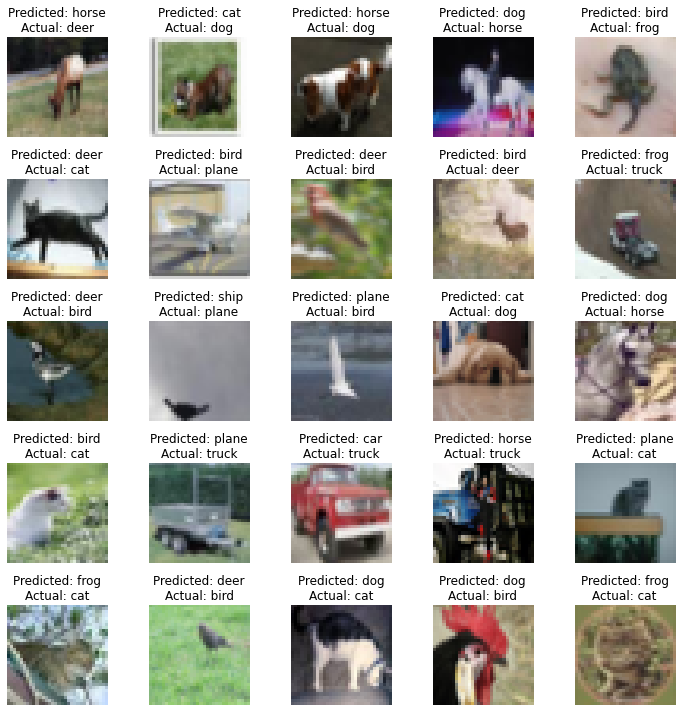

In [65]:
plot_misclassified_images(misclassified_imgs, classes, "misclassified_images.png")

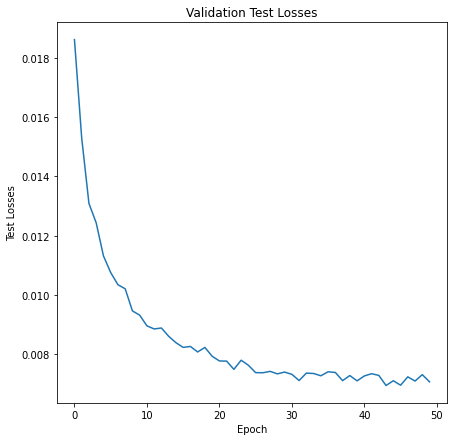

In [66]:
plot_graph(test_losses, "Test Losses")

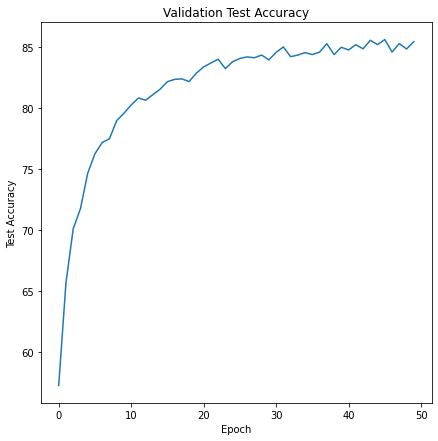

In [67]:
plot_graph(test_accs, "Test Accuracy")